## Students
Please fill in your names and S/U-numbers:
* Student 1 name, S/U-number:
* Student 2 name, S/U-number:
* Student 3 name, S/U-number:

# Statistical Machine Learning 2020
# Assignment 3
# Deadline: 2 December 2020
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* Make sure you __fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells unless necessary, try to write the answers only in the provided cells. Before you turn this problem in, __make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). The assignment was written in (and we strongly recommend using) Python 3 by using the corresponding Python 3 kernel for Jupyter.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __Upload the exercises to Brightspace as a single .zip file containing the submitter's S/U-number: 'SML20_as03_&lt;S/U-number&gt;.zip'__, for example 'SML20_as03_S123456.zip'. For those working in groups, it is sufficient if one team member uploads the solutions.
* For any problems or questions, send us an email, or just ask. Email addresses: G.Bucur@cs.ru.nl, Yuliya.Shapovalova@ru.nl, and tomc@cs.ru.nl.

## Introduction
Assignment 3 consists of:
1. The faulty lighthouse (40 points);
2. __Neural network regression (30 points)__;
3. Bayesian polynomial regression (30 points).

## Libraries

First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from mpl_toolkits.mplot3d import Axes3D

# Set fixed random seed for reproducibility
np.random.seed(2020)

## Neural network regression (30 points)

In this exercise, we train a neural network using backpropagation, in order to learn how to mimic a 2D multimodal probability density. 

1. Read the data set contained in the file _a017.txt_ using the code below and create a 2D-plot of the target probability density function. Notice that the data is in the correct sequence to use in `ax.plot_surface`, but it needs to be reshaped to $41 \times 41$ arrays.

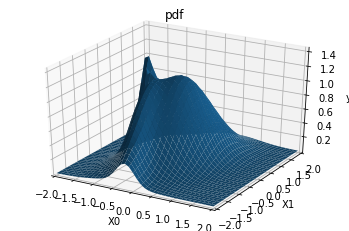

In [ ]:
"""
Read the data set and plot the target pdf.
"""
# Read data
data = np.loadtxt('a017.txt')
# 2D grid values for which the pdf is computed
X = data[:, :2]
# pdf values on the 2D grid
Y = data[:, 2]


# YOUR CODE HERE
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(X[:,0].reshape(41,41), X[:,1].reshape(41,41), Y.reshape(41,41))
plt.title('pdf')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('y')
plt.grid()
plt.show()

#raise NotImplementedError()

2. Implement a 2-layer neural network with $D = 2$ input nodes, $K = 1$ output nodes and $M = 50$ hidden nodes in the intermediate layer that can be trained using a sequential error backpropagation procedure, as described in Bishop $\S5.3$. Use $\tanh(\cdot)$ activation functions for the hidden nodes and a linear activation function (regression) for the output node.

In [ ]:
"""
Define the dimensions of the network.

Parameters
----------
d_in : numeric
    Number of input nodes.
d_out : numeric
    Number of output nodes.
d_hidden : numeric
    Number of hidden nodes.
"""
# Network dimension
d_in = 2      # number of input nodes
d_out = 1     # number of output nodes
d_hidden = 50 # number of nodes in hidden layer

First implement the feed-forward procedure, as described in Bishop, Equation (5.10), with `tanh` activation for the hidden layer and linear activation for the output layer.

In [ ]:
def feed_forward(X, w1, b1, w2, b2):
    """
    Create the feed forward function with tanh and linear activations.
    
    Parameters
    ----------
    X  : (N x d_in) array
        Input data.
    w1 : (d_hidden x d_in) array
        Random weights.
    b1 : (d_hidden x 1) array
        Random weights.
    w2 : (d_out x d_hidden) array
        Random weights.
    b2 : (d_out x 1) array
        Random weights.
    
    Returns
    -------
    array
        The output node for each data point.
    """
    # YOUR CODE HERE
    def activationTanh(x):
        return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    Z1 = np.dot(w1,X.T) + b1 # w1 p*m ,XN*m, Z1 p*N
    a1 = activationTanh(Z1)
    
    Z2 = np.dot(w2,a1) + b2 # w1 1*p ,Xp*N, Z1 1*N
    # activation is y = x, so no need to implement
    return Z2
    #raise NotImplementedError()

In [ ]:
"""
Tests for feed_forward.
"""
w1 = np.zeros((d_hidden, d_in))
b1 = np.zeros((d_hidden, 1))
w2 = np.zeros((d_out, d_hidden))
b2 = np.zeros((d_out, 1))
F = feed_forward(np.zeros((4, d_in)), w1, b1, w2, b2)
np.testing.assert_array_almost_equal(F, np.array([[0, 0, 0, 0]]))


Initialise the weights to random values in the interval $[-1, 1]$. Plot a 2D graph of the initial output of the network over the $[-2,2]\times[-2,2]$ input grid using `ax.plot_surface`.

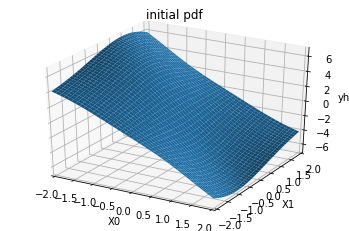

In [ ]:
"""
Plot a 2D graph of the initial output.
"""
# YOUR CODE HERE
np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))
F = feed_forward(X, w1, b1, w2, b2)

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(X[:,0].reshape(41,41), X[:,1].reshape(41,41), F.reshape(41,41))
plt.title('initial pdf')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('yhat')
plt.grid()
plt.show()

#raise NotImplementedError()

3. Train the network on this data set by repeatedly looping over all data points and updating the weights in the network after each loop (epoch). First define the function for training the neural network. Set the learning rate parameter $\eta = 0.01$. Visualization of the network output plays an important role in monitoring the progress, so make sure to include a block of code which display a 2D graph with the current output, just like the plot in the previous part.

In [ ]:
def train_network(X, Y, num_cycles, eta, d_in, d_hidden, d_out, 
                  init_w1, init_b1, init_w2, init_b2, seed = 2020,
                  batch = False, permute = True, disp_freq = 5):
    """
    The function to train the neural network.

    Parameters
    ----------
    X : N x d_in array
        Input coordinates.
    Y : N x d_out array
        Output probability density.
    num_cycles : integer
        Number of training cycles.
    eta : float
        Learning rate.
    d_in : integer
        Number of input nodes.
    d_hidden : integer
        Number of nodes in hidden layer.
    d_out : integer
        Number of output nodes.
    init_w1 : d_hidden x d_in array
        Initial weights for hidden nodes.
    init_b1 : d_hidden x 1 array
        Initial bias for hidden nodes.
    init_w2 : d_out x d_hidden array
        Initial weights for output node.
    init_b2 : d_out x 1 array
        Initial bias for output node.
    seed : integer
        Seed for reproducible results.
    batch : bool
        Enable batch training. (can be used later in the exercise)
    permute : bool
        Permute inputs and outputs. (can be used later in the exercise)
    disp_freq : integer
        How many times should the results be displayed during training.
    """
        
    # YOUR CODE HERE
    def feed_forward_(X, w1, b1, w2, b2):
        # YOUR CODE HERE
        def activationTanh(x):
            return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
        Z1 = np.dot(w1,X.T) + b1 # w1 p*m ,XN*m, Z1 p*N
        a1 = activationTanh(Z1)

        Z2 = np.dot(w2,a1) + b2 # w1 1*p ,Xp*N, Z1 1*N
        # activation is y = x, so no need to implement
        return Z2, a1,Z1
        #raise NotImplementedError()
    
    def make_mini_batches(N,batch_size=16, shuffle=True):
        indices = []
        random_indices = np.arange(N)
        if shuffle:
            np.random.shuffle(random_indices)
        mini_batch = []
        n_minibatches = N // batch_size 
        for i in range(n_minibatches):
            indices.append((random_indices[i*batch_size:i*batch_size + batch_size]))
        i = i+1
        if N % batch_size != 0:
            indices.append((random_indices[i*batch_size:N]))
        return indices
    
    
    m = X.shape[0]
    
    
    w1 = init_w1.copy()
    w2 = init_w2.copy()
    b1 = init_b1.copy()
    b2 = init_b2.copy()
    for j in range(num_cycles):
        if batch:
            minibatches = make_mini_batches(X.shape[0],batch_size=128, shuffle=True)
            for minibatch in minibatches:
                # Select a minibatch
                minibatch_X = X[minibatch,:]
                minibatch_Y =  Y[minibatch]

                # forward propagate through the network
                a, a1,Z1 = feed_forward_(minibatch_X, w1, b1, w2, b2)
                # back propagate through the network
                dy = a - minibatch_Y
                dW2 = (1 / m) * np.dot(dy, np.transpose(a1))
                db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
                dZ1 = np.dot(np.transpose(w2), dy) * (1-np.power(a1, 2))
                dW1 = (1 / m) * np.dot(dZ1, minibatch_X)
                db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
                #update parameters
                w1 = w1 - eta * dW1
                b1 = b1 - eta * db1
                w2 = w2 - eta * dW2
                b2 = b2 - eta * db2
            if j%disp_freq == 0:
                # Plot the surface.
                F,_,_ = feed_forward_(X, w1, b1, w2, b2)
                fig = plt.figure()
                ax = fig.gca(projection='3d')
                surf = ax.plot_surface(X[:,0].reshape(41,41), X[:,1].reshape(41,41), F.reshape(41,41))
                plt.title('pdf')
                ax.set_xlim(-2, 2)
                ax.set_ylim(-2, 2)
                ax.set_xlabel('X0')
                ax.set_ylabel('X1')
                ax.set_zlabel('yhat')
                plt.grid()
                plt.show()
        
        else:
            
            """
            w1 shape  (50, 2)
            w2 shape  (1, 50)
            a shape  (1, 1681)
            a1 shape  (50, 1681)
            w2 shape  (1, 50)
            dZ1 shape  (1, 50)
            X shape  (1681, 2)
            dW1 shape  (50, 2)
            """
            if permute:
                rand_indices = np.random.permutation(X.shape[0])
                X_ = X[rand_indices,:]
                Y_ = Y[rand_indices]
            else:
                X_ = X
                Y_ = Y
            # forward propagate through the network
            a, a1,Z1 = feed_forward_(X_, w1, b1, w2, b2)
            # back propagate through the network
            dy = a - Y_
            dW2 = (1 / m) * np.dot(dy, np.transpose(a1)) # 1*50
            db2 = (1 / m) * np.sum(dy, axis=1, keepdims=True)
            dZ1 = np.dot(np.transpose(w2), dy) * (1-np.power(a1, 2))
            dW1 = (1 / m) * np.dot(dZ1, X_)
            db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
            #update parameters
            w1 = w1 - eta * dW1
            b1 = b1 - eta * db1
            w2 = w2 - eta * dW2
            b2 = b2 - eta * db2
            if j%disp_freq == 0:
                fig = plt.figure()
                ax = fig.gca(projection='3d')
                # Plot the surface.
                F,_,_ = feed_forward_(X, w1, b1, w2, b2)
                surf = ax.plot_surface(X[:,0].reshape(41,41), X[:,1].reshape(41,41), F.reshape(41,41))
                plt.title('pdf')
                ax.set_xlim(-2, 2)
                ax.set_ylim(-2, 2)
                ax.set_xlabel('X0')
                ax.set_ylabel('X1')
                ax.set_zlabel('yhat')
                plt.grid()
                plt.show()

Run the training phase for at least 2000 complete cycles (epochs) and follow the progress by plotting the updated network output after every 200 full cycles. Verify that the output starts to resemble the multimodal density.

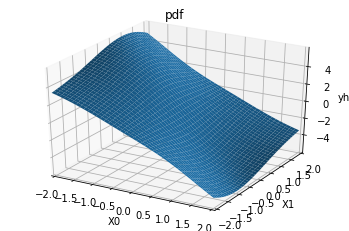

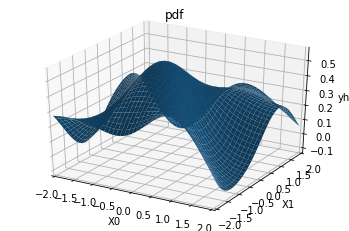

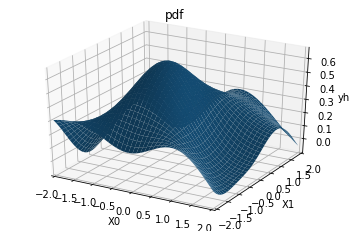

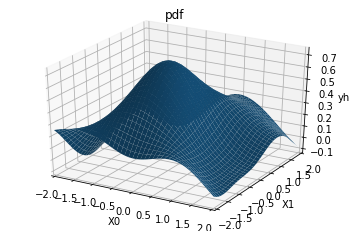

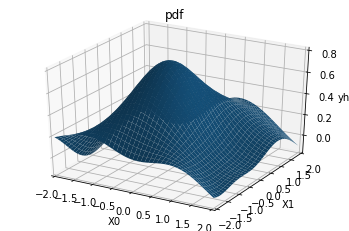

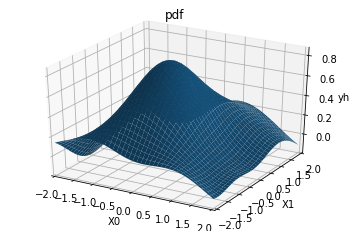

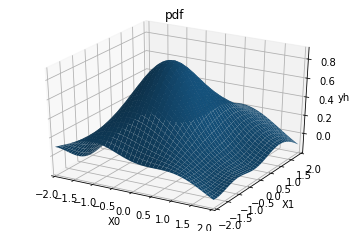

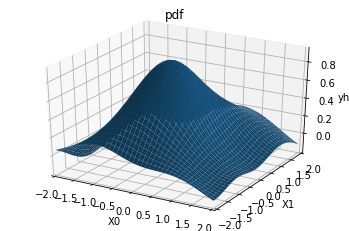

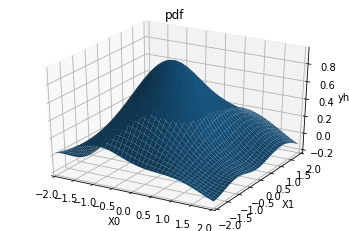

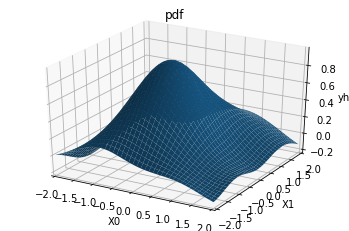

In [ ]:
"""
Train the network for a number of training cycles.
"""
# YOUR CODE HERE
np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 2000, 0.01, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = True, permute = False, disp_freq = 200)

#raise NotImplementedError()

How does the final output of the network compare to the target distribution in the data? Explain. How could you improve the neural network in terms of speed of convergence and/or quality of the approximation?

YOUR ANSWER HERE:

**we can do several things,**

**1- initialize with change the different random dist. so that we have faster convergence**

**2- reduce the eta for having better approximation but it would be slower**

**3- add number of hidden units for better approximation**

**4- add number of hidden layers**

**5- using batch with random shuffle(which we did above)**

4. Permute the $\mathbf{X}$ and $\mathbf{Y}$ arrays to a random order using the `np.random.permutation` function, keeping corresponding $\mathbf{x}$ and $y$ together. Repeat the network training session using this randomized data set. Verify that convergence is now much quicker. Can you understand why?

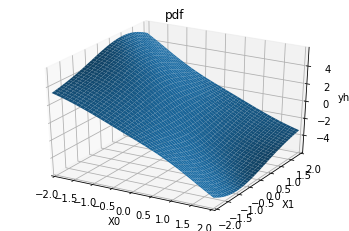

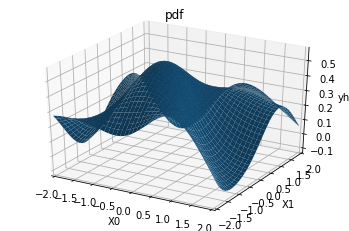

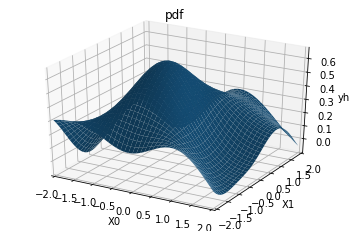

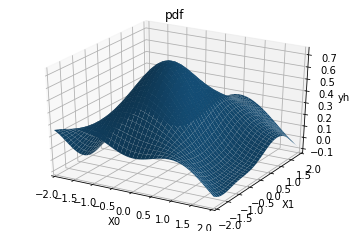

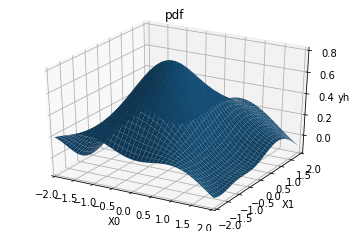

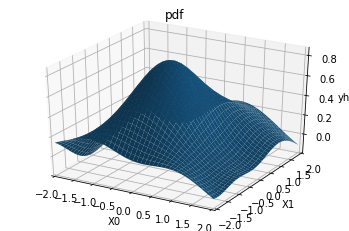

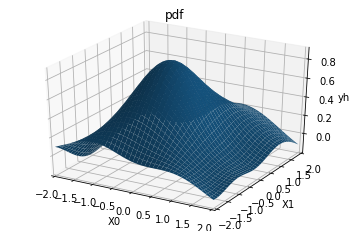

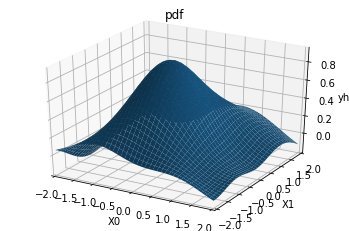

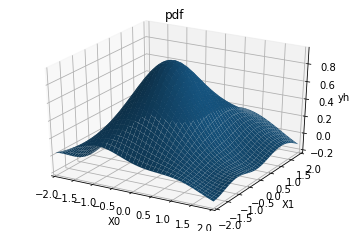

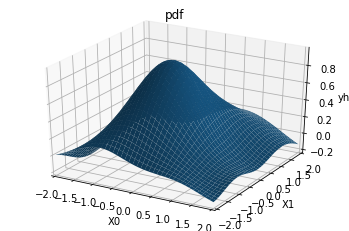

In [ ]:
"""
Train the network for a number of training cycles (epochs) using permuted data as input.
"""
# YOUR CODE HERE
np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 2000, 0.01, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = False, permute = True, disp_freq = 200)

#raise NotImplementedError()

5. Try out the effect of different numbers of hidden nodes, different initial weights and different learning rates on speed and quality of the network training. Explain your results.

__Note:__ Here you can add new cells should you need them.

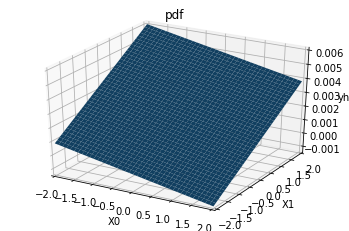

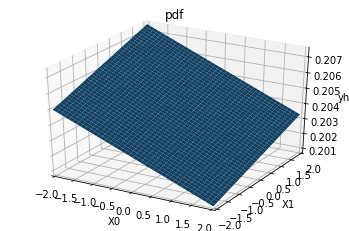

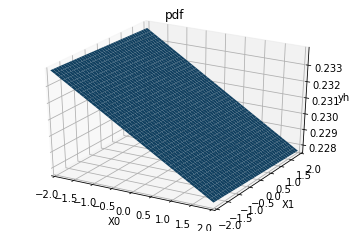

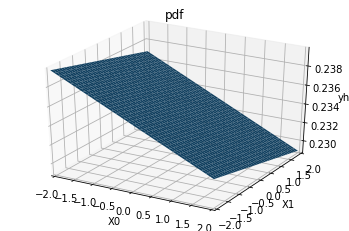

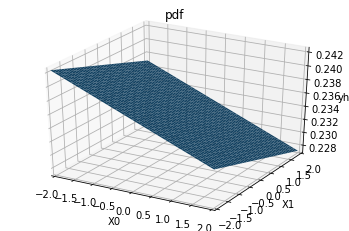

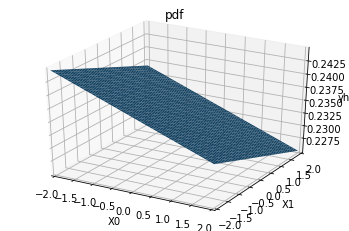

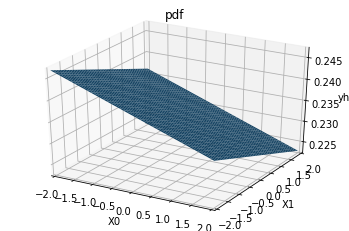

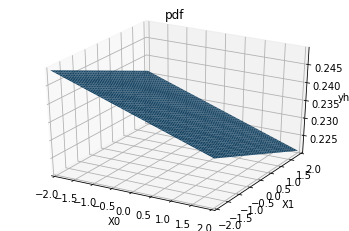

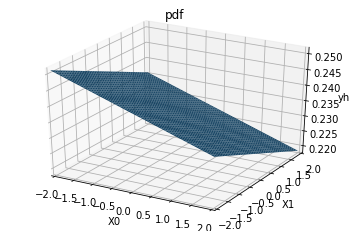

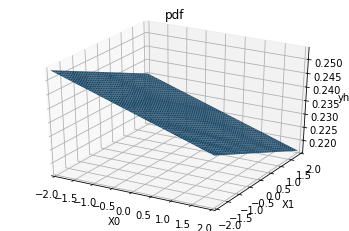

In [ ]:
"""
Train the network using various hyperparameters (hidden nodes, initial weights, learning rates).
"""
# YOUR CODE HERE
# random normal initialization
np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.normal(0, 0.01, size=(d_hidden, d_in))
b1 = np.zeros((d_hidden, 1))
w2 = np.random.normal(0, 0.01, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 2000, 0.01, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = False, permute = True, disp_freq = 200)

#raise NotImplementedError()

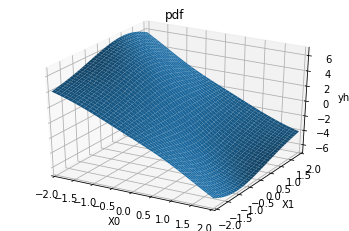

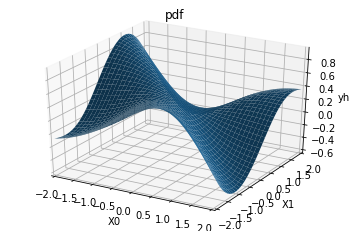

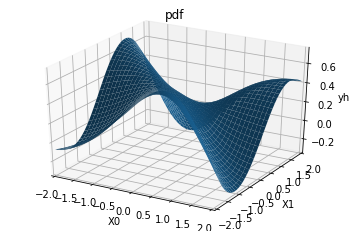

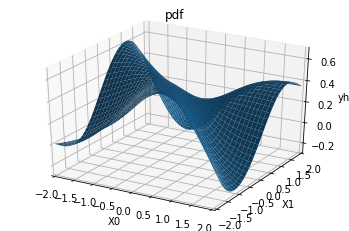

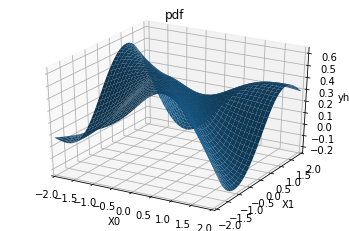

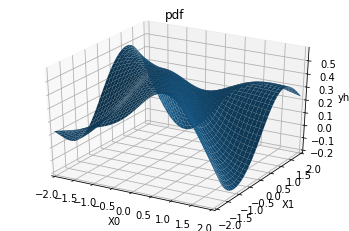

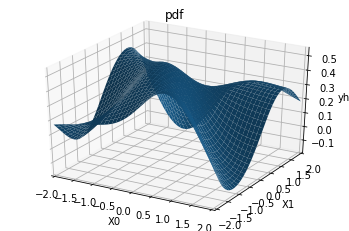

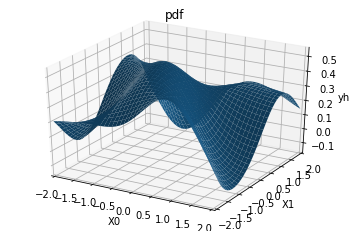

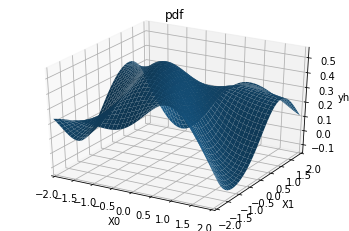

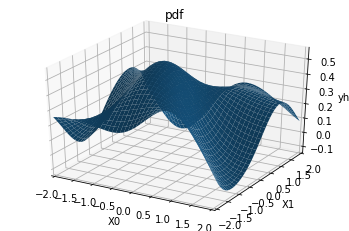

In [ ]:
"""
Train the network with eta = .001
"""
# YOUR CODE HERE
np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 2000, 0.001, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = False, permute = True, disp_freq = 200)

#raise NotImplementedError()

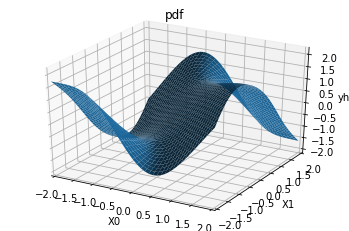

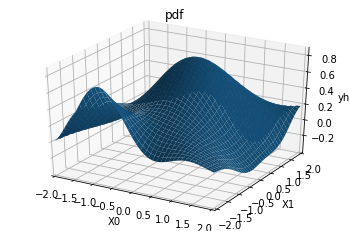

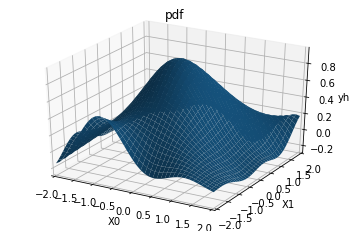

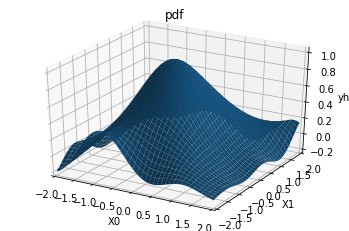

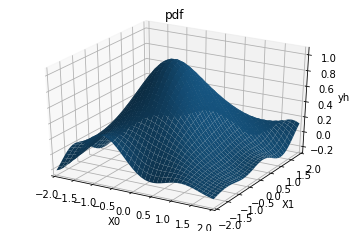

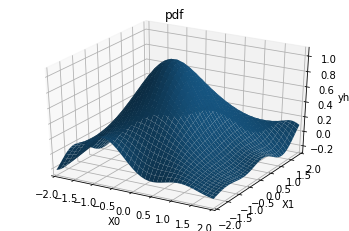

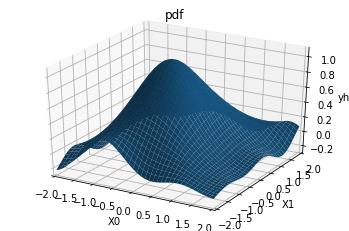

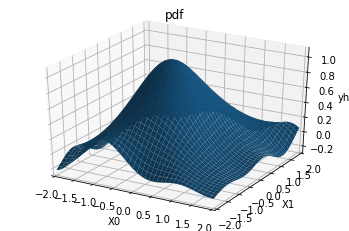

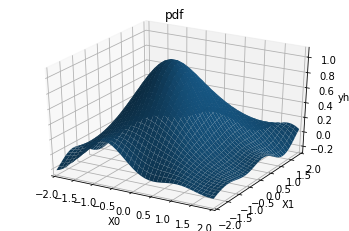

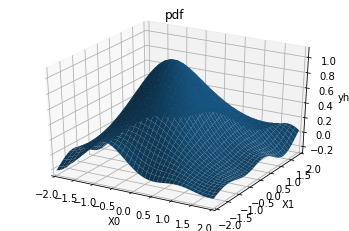

In [ ]:
"""
Train the network with 256 hidden units and eta = .01
"""
# YOUR CODE HERE
# Network dimension
d_in = 2      # number of input nodes
d_out = 1     # number of output nodes
d_hidden = 256 # number of nodes in hidden layer

np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 2000, 0.01, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = False, permute = True, disp_freq = 200)

#raise NotImplementedError()

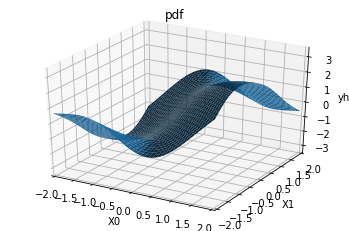

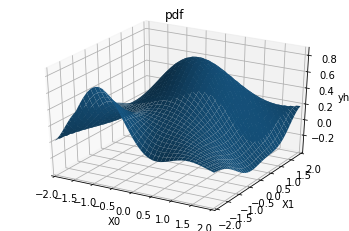

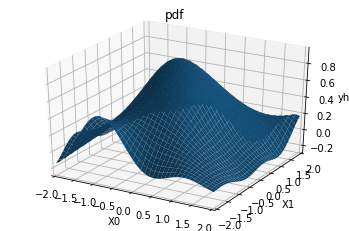

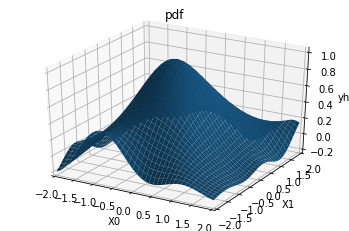

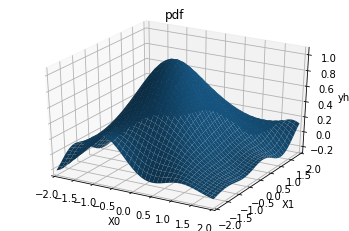

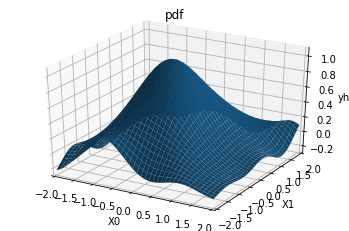

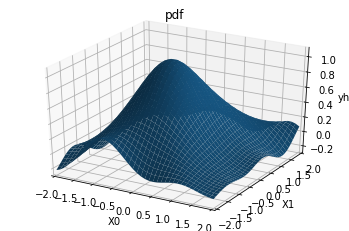

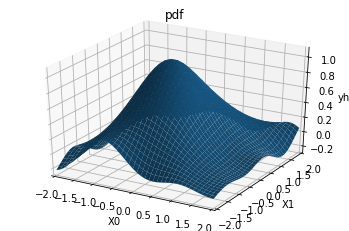

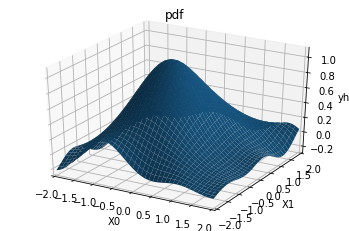

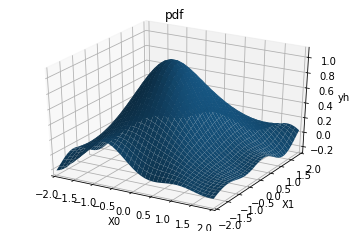

In [ ]:
"""
Train the network with 256 hidden units and eta = .01 and batch = True
"""
# YOUR CODE HERE
# Network dimension
d_in = 2      # number of input nodes
d_out = 1     # number of output nodes
d_hidden = 256 # number of nodes in hidden layer

np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 2000, 0.01, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = True, permute = False, disp_freq = 200)

#raise NotImplementedError()

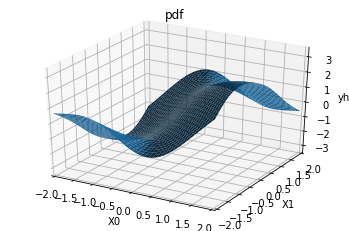

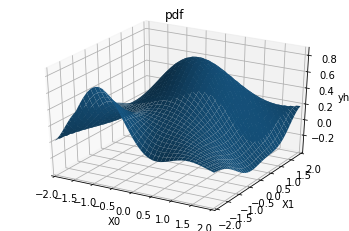

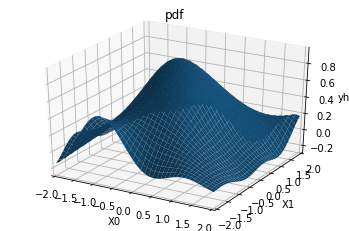

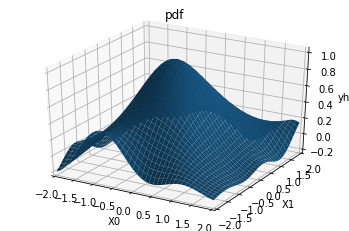

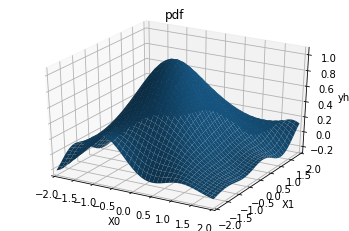

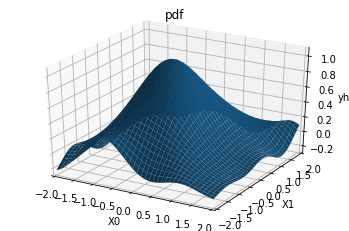

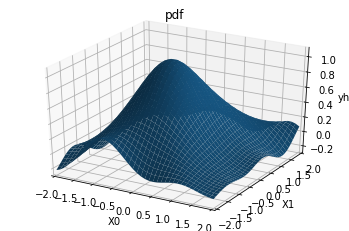

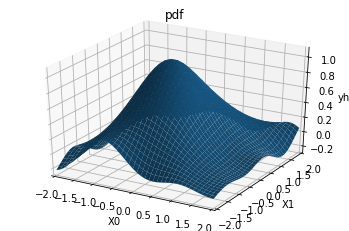

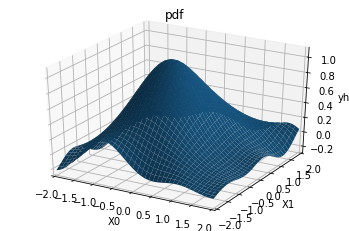

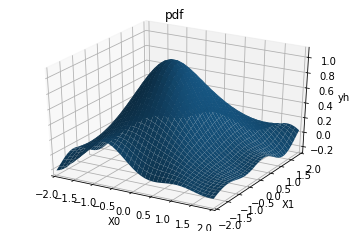

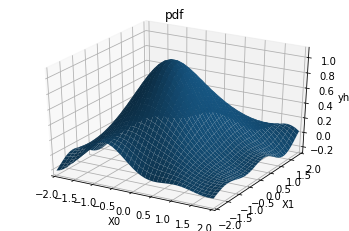

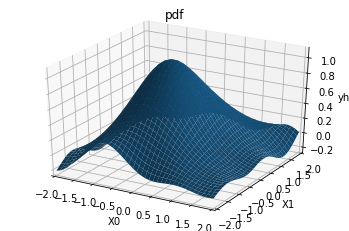

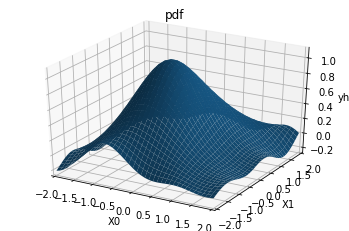

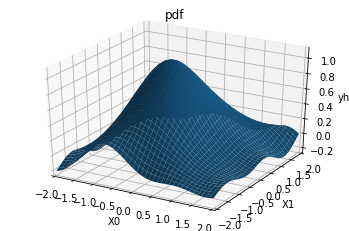

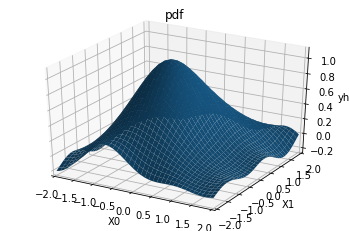

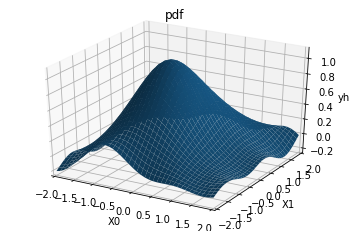

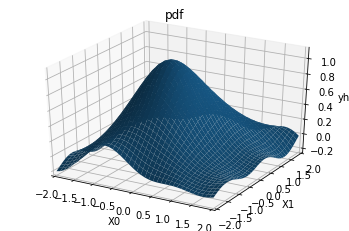

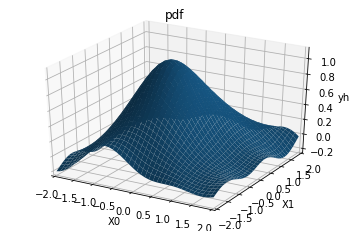

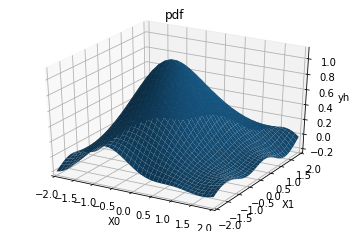

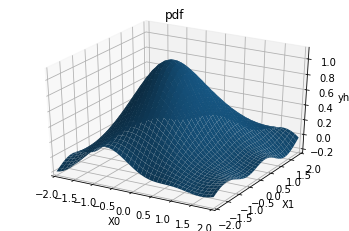

In [ ]:
"""
Train the network with 256 hidden units and eta = .01 and batch = True and itertaion = 4000
"""
# YOUR CODE HERE
# Network dimension
d_in = 2      # number of input nodes
d_out = 1     # number of output nodes
d_hidden = 256 # number of nodes in hidden layer

np.random.seed(36) # this is for getting the same output, everytime we run
w1 = np.random.uniform(low=-1, high=1, size=(d_hidden, d_in)) # initial with random numbers with pdf = 1/(a-b)
b1 = np.zeros((d_hidden, 1))
w2 = np.random.uniform(low=-1, high=1, size=(d_out, d_hidden))
b2 = np.zeros((d_out, 1))

train_network(X, Y, 4000, 0.01, d_in, d_hidden, d_out, 
                  w1, b1, w2, b2, seed = 2020,
                  batch = True, permute = False, disp_freq = 200)

#raise NotImplementedError()

**1- as can be seen, in terms of speed and convergence, decreasing the eta, gives a worse result that eta = .01**

**2- increasing number of hidden units with batch = False, permute = True, increases the training time, but gives a better result**

**3- increasing number of hidden units and using with batch = True, permute = False, increases the training time, but gives teh same result as the the batch = False, permute = True**

**4- also increasing iteration with case 3, does not effect the result much after 2000 iteration**

**the result is that increasing number of layers gives a better result, eta = .01 is the best learning rate and with random batches of size 128 we got a better result han all of the cases**